# **Importing required libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Importing the Dataset**

In [5]:
df = pd.read_csv("train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **Analysing the Dataset**

In [6]:
df.shape

(45211, 11)

In [7]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [9]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
print("Percentage of no = ",39922/(39922+5289)*100,"%")
print("Percentage of yes = ",5289/(39922+5289)*100,"%")

Percentage of no =  88.30151954170445 %
Percentage of yes =  11.698480458295547 %


From above analysis, we can understand that this an imbalanced dataset with 88.3% of the data is in "no" class and remaining 11.7% is with "yes" class.

# **Cleaning the Data**

In [11]:
# checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [12]:
# checking for duplicate values
df.duplicated().sum()

6

In [13]:
# Dropping Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0


There were 6 duplicate values found, which were removed. There are no null values in the data

In [14]:
# Checking the format of the data columns

df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

## **Checking the Unknown Values in the Data**




In [15]:
df['Target'] = df['y'].map({"no":0, "yes":1})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


### **Job**

In [16]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Since unknown count is very less, imputing it with mode value - blue collar

In [17]:
df['job'] = df['job'].replace('unknown', 'blue-collar')
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

### **Marital**

In [18]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

### **education_qual**

In [19]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

Since unknown count is very less, imputing it with mode value - secondary

In [20]:
df['education_qual'] = df['education_qual'].replace('unknown', 'secondary')
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

### **call_type**

In [21]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

Unknown count is significantly high, so it will be kept as it is.

### **mon**

In [22]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

### **prev_outcome**

In [23]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

Unknown count is significantly high, so it will be kept as it is.

## **Outlier Detection and correction**

In [24]:
df.describe()

,age,day,dur,num_calls,Target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


### **Age**

<Axes: xlabel='age'>

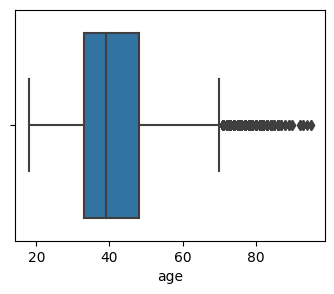

In [25]:
# Box plot

plt.figure(figsize=(4,3))
sns.boxplot(x=df['age'])

In [26]:
# From above plot, we can see that there are many data points on the whisker.

# Getting the IQR for 'age'

iqr = df.age.quantile(0.75)-df.age.quantile(0.25)
Upper_threshold = df.age.quantile(0.75) + (1.5*iqr)
Lower_threshold = df.age.quantile(0.25) - (1.5*iqr)
Upper_threshold, Lower_threshold

(70.5, 10.5)

In [27]:
# clipping outliers for age

df.age = df.age.clip(10.5,70.5)

<Axes: xlabel='age'>

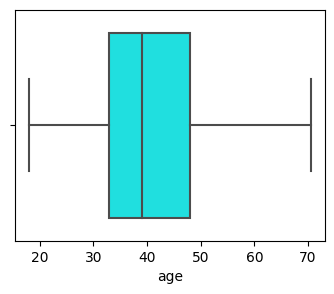

In [28]:
# plotting Age column after outlier correction

plt.figure(figsize=(4,3))
sns.boxplot(x=df['age'],color='Cyan')

### **Day**

<Axes: xlabel='day'>

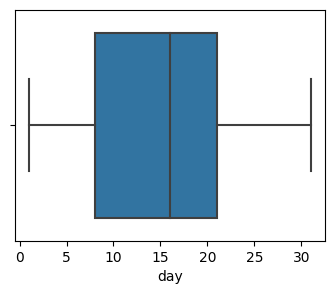

In [29]:
# Box plot

plt.figure(figsize=(4,3))
sns.boxplot(x = df.day)

In [30]:
# IQR for day

iqr = df.day.quantile(0.75)-df.day.quantile(0.25)
Upper_threshold = df.day.quantile(0.75) + (1.5*iqr)
Lower_threshold = df.day.quantile(0.25) - (1.5*iqr)
Upper_threshold, Lower_threshold

(40.5, -11.5)

There are no data points on the whiskers as well as when checked with IQR the data is with in the upper and lower threshold. No correction needed

### **dur**

<Axes: xlabel='dur'>

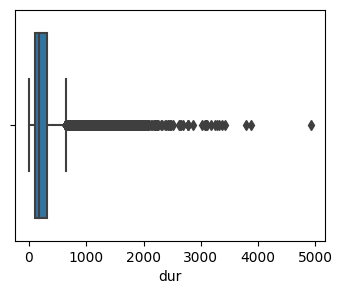

In [31]:
# Box plot

plt.figure(figsize=(4,3))
sns.boxplot(x=df.dur)

In [32]:
# From above plot, we can see that there are many data points on the whisker.

# Getting the IQR for 'dur'

iqr = df.dur.quantile(0.75)-df.dur.quantile(0.25)
Upper_threshold = df.dur.quantile(0.75) + (1.5*iqr)
Lower_threshold = df.dur.quantile(0.25) - (1.5*iqr)
Upper_threshold, Lower_threshold

(643.0, -221.0)

In [33]:
# Clipping the outliers

df.dur = df.dur.clip(-219.5,640.5)

<Axes: xlabel='dur'>

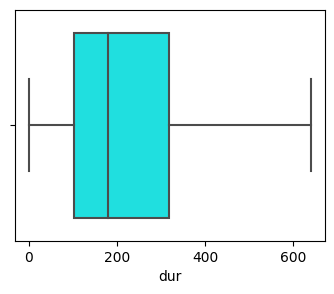

In [34]:
# plotting Dur column after outlier correction

plt.figure(figsize=(4,3))
sns.boxplot(x=df['dur'],color='Cyan')

### **num_calls**

<Axes: xlabel='num_calls'>

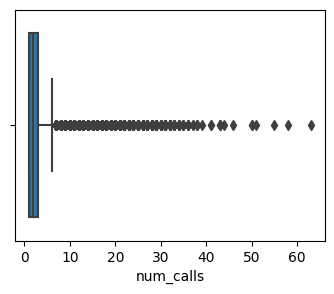

In [35]:
# Box plot

plt.figure(figsize=(4,3))
sns.boxplot(x=df.num_calls)

In [36]:
# From above plot, we can see that there are many data points on the whisker.

# Getting the IQR for 'num_calls'

iqr = df.num_calls.quantile(0.75)-df.num_calls.quantile(0.25)
Upper_threshold = df.num_calls.quantile(0.75) + (1.5*iqr)
Lower_threshold = df.num_calls.quantile(0.25) - (1.5*iqr)
Upper_threshold, Lower_threshold

(6.0, -2.0)

In [37]:
# Clipping the outliers

df.num_calls = df.num_calls.clip(-2.0,6.0)

<Axes: xlabel='num_calls'>

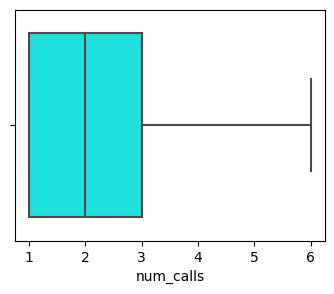

In [38]:
# plotting num_calls column after outlier correction

plt.figure(figsize=(4,3))
sns.boxplot(x=df['num_calls'],color='Cyan')

# **EDA - Exploratory Data Analysis**

## **Age**

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

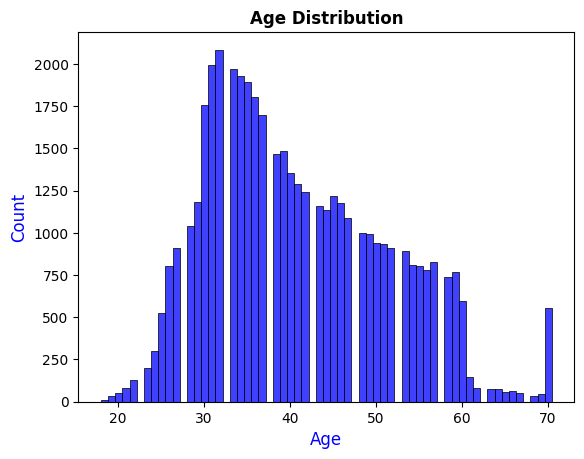

In [39]:
# Plotting the Age distribution to check the maximum and minimum reach

plt.title('Age Distribution', fontsize = 12, color='black', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='blue')
plt.ylabel('Count',fontsize = 12, color='blue')
sns.histplot((df.age),color='blue')

The maximum reach is between ages 30-40 yrs.

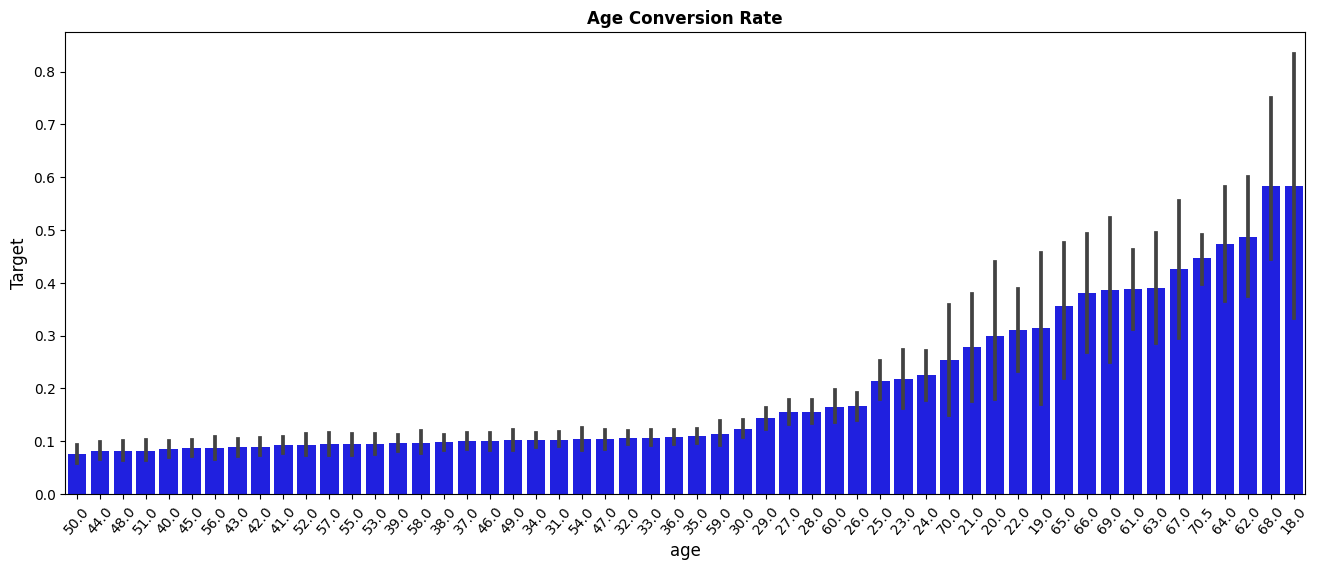

In [40]:
# Plotting the conversion rate of different ages.

age_conversion_rates = df.groupby("age")["Target"].mean()
sorted_age = age_conversion_rates.reset_index().sort_values("Target")["age"]
plt.figure(figsize = (16,6))
plt.title('Age Conversion Rate', fontsize = 12, color='black', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='black')
plt.ylabel('Count',fontsize = 12, color='black')
sns.barplot(x = 'age', y = 'Target', data = df, order = sorted_age, color = 'blue')
plt.xticks(rotation=50)
plt.show()

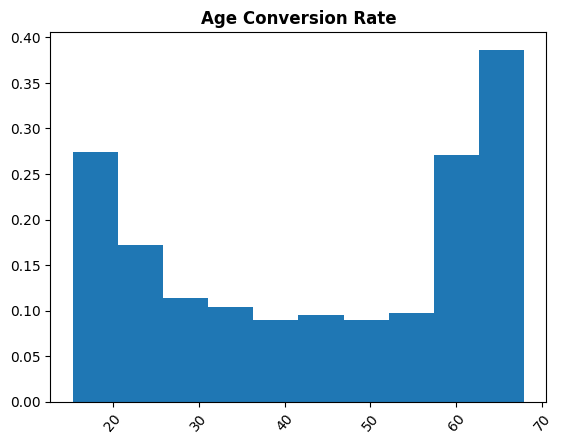

In [41]:
bins = np.linspace(df.age.min(),df.age.max(),11)
c=np.digitize(df.age,bins)
plt.bar(bins[:-1], [np.mean(df.Target.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.title('Age Conversion Rate', fontsize = 12, color='black', fontweight='bold')
plt.xticks(rotation=50)


plt.show()

Highest Conversion can been seen in above 60+ years and below 20.




## **Job**

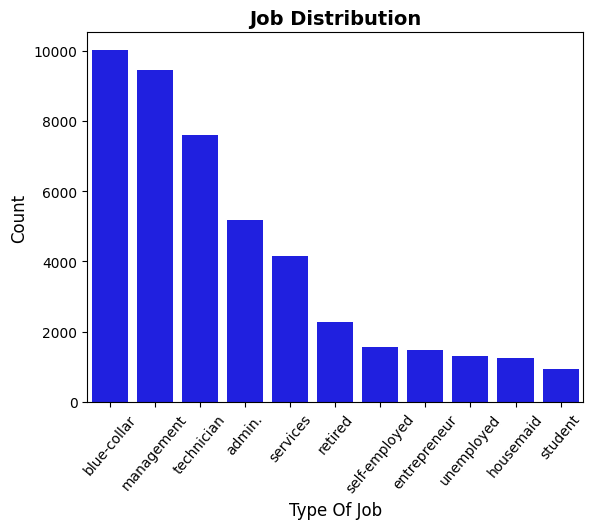

In [42]:
# Plotting the Job classes to check the maximum and minimum reach

# Calculating the value counts
job_counts = df['job'].value_counts()

# Plotting
sns.barplot(x=job_counts.index, y=job_counts.values, color = 'blue')
plt.title('Job Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Type Of Job', fontsize=12, color='black')
plt.xticks(rotation=50)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

Blue-collar and management jobs have the highest reach and lowest is observed in student and housemaids

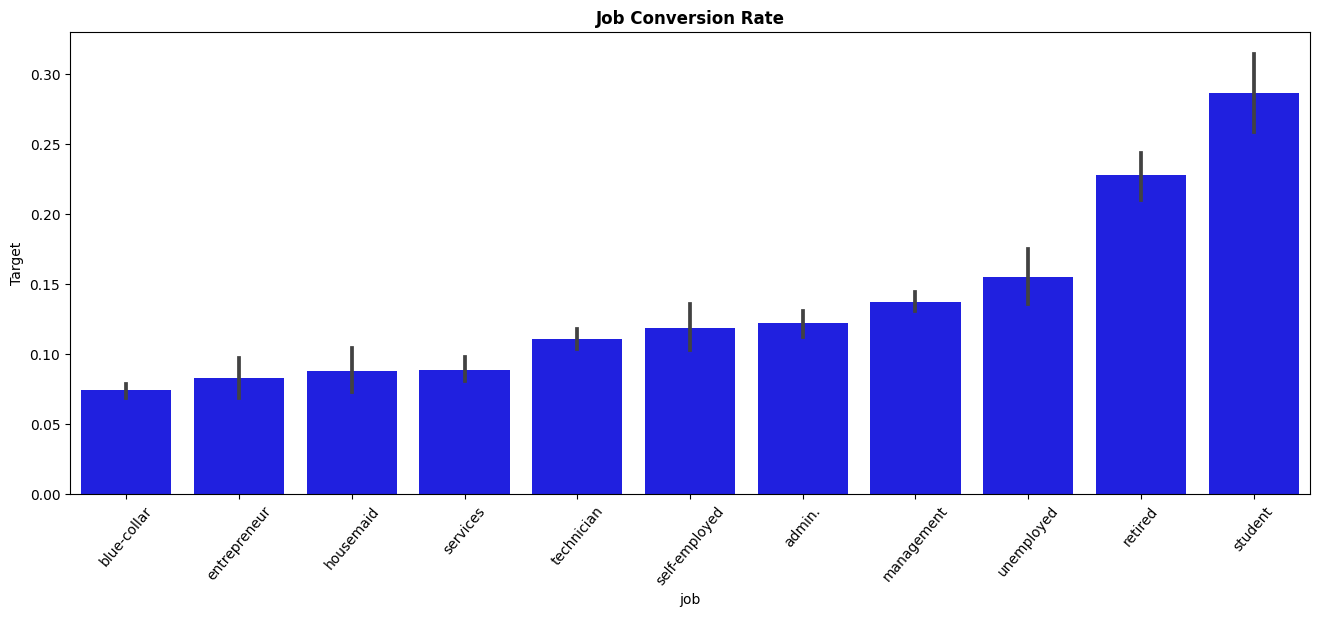

In [43]:
# Plotting the conversion rate of different job types.

job_conversion_rates = df.groupby("job")["Target"].mean()
sorted_job = job_conversion_rates.reset_index().sort_values("Target")["job"]
plt.figure(figsize = (16,6))
plt.title('Job Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'job', y = 'Target', data = df, order = sorted_job, color = 'blue')
plt.xticks(rotation=50)
plt.show()

Highest Conversion - Student and Retired

Lowest Conversion - Blue-collar and entrepreneur

## **marital**

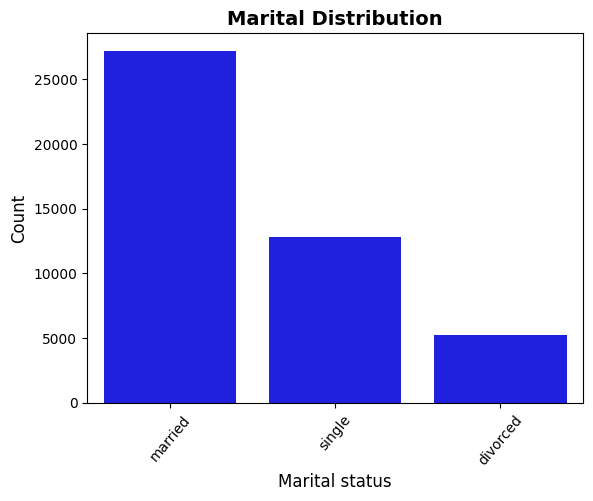

In [44]:
# Plotting the marital classes to check the maximum and minimum reach

# Calculating the value counts
marital_counts = df['marital'].value_counts()

# Plotting
sns.barplot(x=marital_counts.index, y=marital_counts.values, color = 'blue')
plt.title('Marital Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Marital status', fontsize=12, color='black')
plt.xticks(rotation=50)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

Maximim reach is towards married and lowest towards divorced.

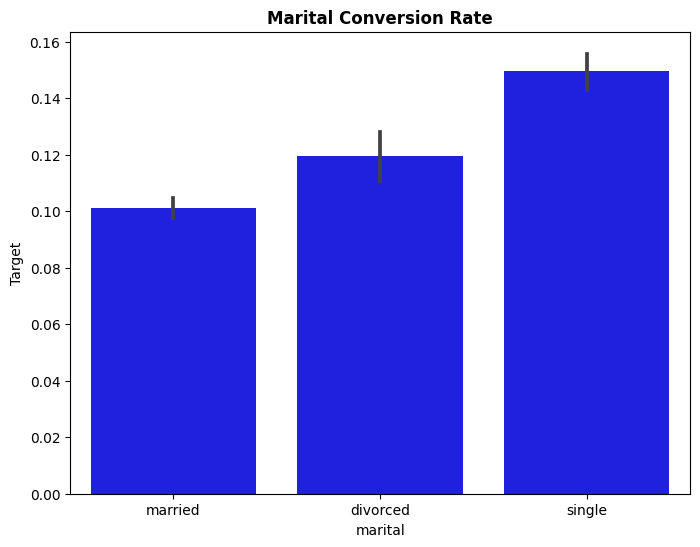

In [45]:
# Plotting the conversion rate of different marital types.

marital_conversion_rates = df.groupby("marital")["Target"].mean()
sorted_marital = marital_conversion_rates.reset_index().sort_values("Target")["marital"]
plt.figure(figsize = (8,6))
plt.title('Marital Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'marital', y = 'Target', data = df, order = sorted_marital, color = 'blue')
plt.xticks(rotation=00)
plt.show()

Highest Conversion - Single

Lowest Conversion - Married

## **education_qual**

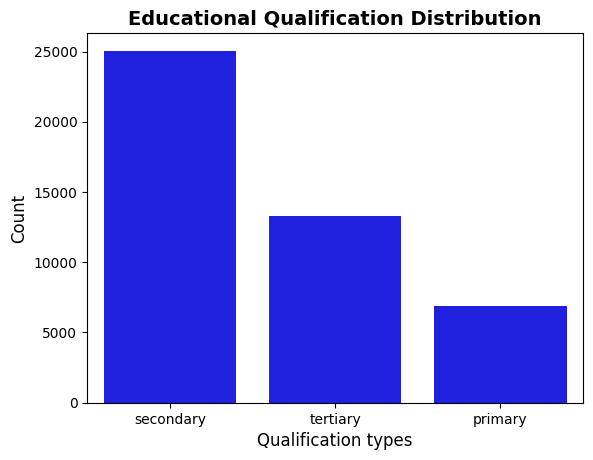

In [46]:
# Plotting the education qualifications to check the maximum and minimum reach

# Calculating the value counts
education_qual_counts = df['education_qual'].value_counts()

# Plotting
sns.barplot(x=education_qual_counts.index, y=education_qual_counts.values, color = 'blue')
plt.title('Educational Qualification Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Qualification types', fontsize=12, color='black')
plt.xticks(rotation=00)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

Maximum reach has been to secondary type of qualification and least to primary.

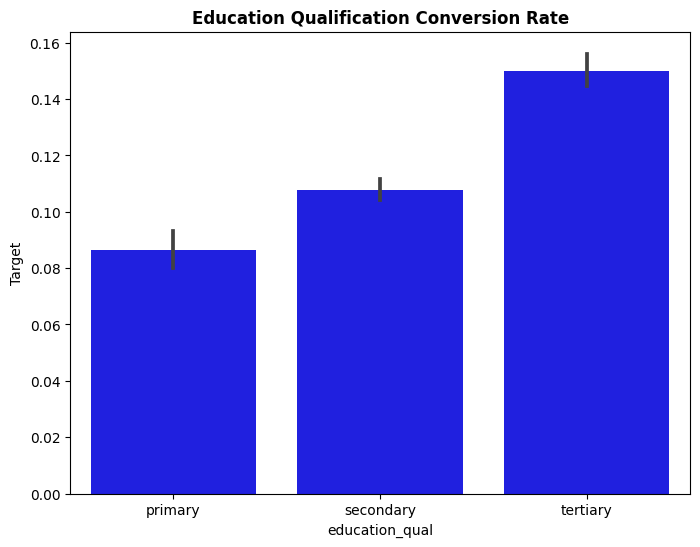

In [47]:
# Plotting the conversion rate of different educational qualification types.

education_qual_conversion_rates = df.groupby("education_qual")["Target"].mean()
sorted_education_qual = education_qual_conversion_rates.reset_index().sort_values("Target")["education_qual"]
plt.figure(figsize = (8,6))
plt.title('Education Qualification Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'education_qual', y = 'Target', data = df, order = sorted_education_qual, color = 'blue')
plt.xticks(rotation=00)
plt.show()

Highest Conversion - Tertiary

Lowest Conversion - Primary

## **call_type**

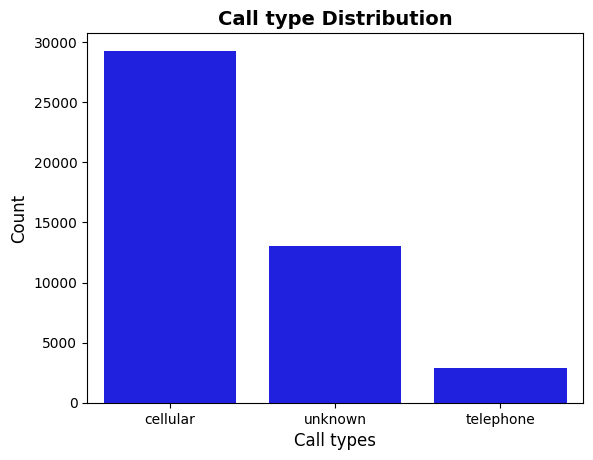

In [48]:
# Plotting the call types to check the maximum and minimum reach

# Calculating the value counts
call_type_counts = df['call_type'].value_counts()

# Plotting
sns.barplot(x=call_type_counts.index, y=call_type_counts.values, color = 'blue')
plt.title('Call type Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Call types', fontsize=12, color='black')
plt.xticks(rotation=00)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

Maximum reach is through cellular and minimum through telephone.

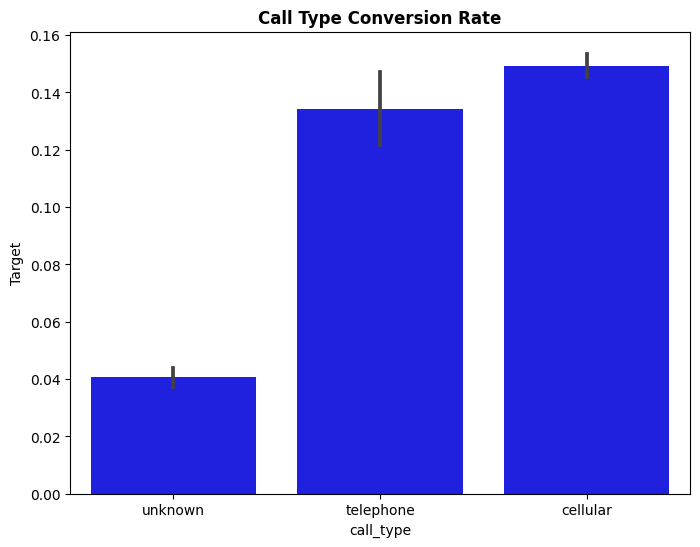

In [49]:
# Plotting the conversion rate of different call types.

call_type_conversion_rates = df.groupby("call_type")["Target"].mean()
sorted_call_type = call_type_conversion_rates.reset_index().sort_values("Target")["call_type"]
plt.figure(figsize = (8,6))
plt.title('Call Type Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'call_type', y = 'Target', data = df, order = sorted_call_type, color = 'blue')
plt.xticks(rotation=00)
plt.show()

Highest Conversion - Cellular

Lowest Conversion - Unknown

## **Day**

<Axes: title={'center': 'Day Distribution'}, xlabel='Day', ylabel='Count'>

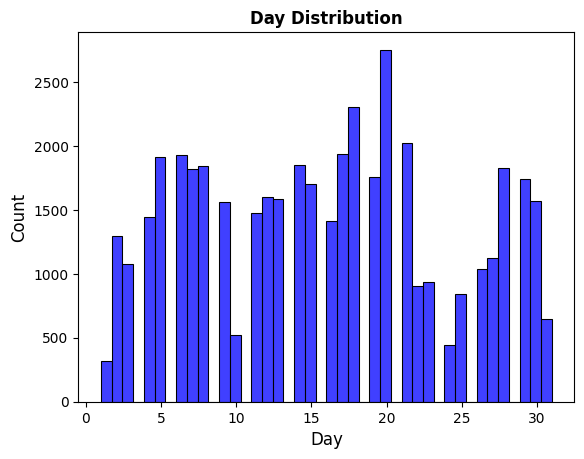

In [50]:
# Plotting the Day distribution to check the maximum and minimum reach

plt.title('Day Distribution', fontsize = 12, color='black', fontweight='bold')
plt.xlabel('Day',fontsize = 12, color='black')
plt.ylabel('Count',fontsize = 12, color='black')
sns.histplot((df.day),color='blue')

Maximum reach is on the mid month and lowest at start of the month

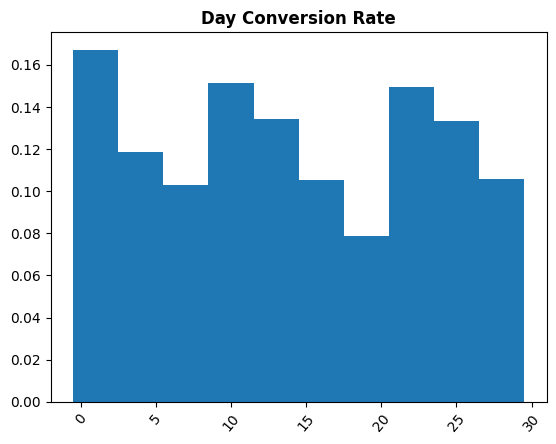

In [51]:
bins = np.linspace(df.day.min(),df.day.max(),11)
c=np.digitize(df.day,bins)
plt.bar(bins[:-1], [np.mean(df.Target.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.title('Day Conversion Rate', fontsize = 12, color='black', fontweight='bold')
plt.xticks(rotation=50)


plt.show()

Across the month, there are 3 peaks for highest conversion.

Highest Conversion - 1st day and 10th day of the month

Lowest Conversion - 19th day and 20th day of the month

## **Month**

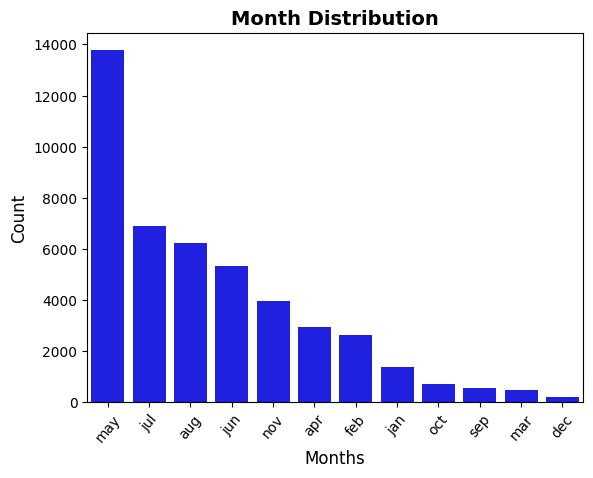

In [52]:
# Plotting the months to check the maximum and minimum reach

# Calculating the value counts
mon_counts = df['mon'].value_counts()

# Plotting
sns.barplot(x=mon_counts.index, y=mon_counts.values, color = 'blue')
plt.title('Month Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Months', fontsize=12, color='black')
plt.xticks(rotation=50)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

May month has the highest reach and december month the lowest

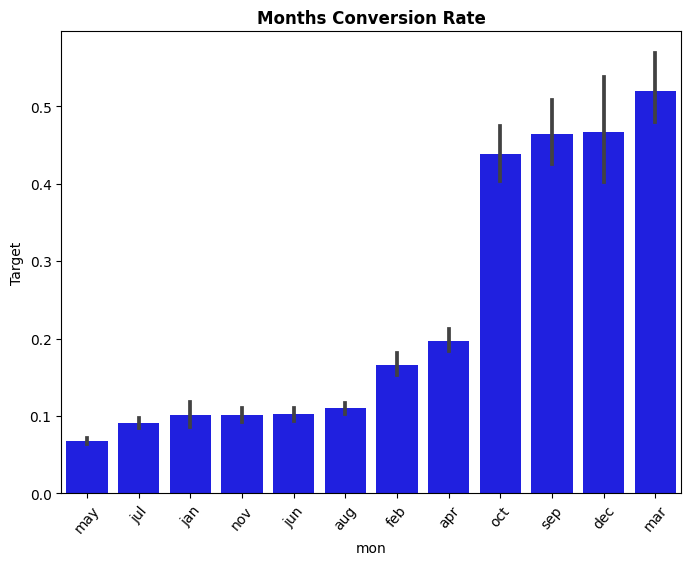

In [53]:
# Plotting the conversion rate of different months.

mon_conversion_rates = df.groupby("mon")["Target"].mean()
sorted_mon = mon_conversion_rates.reset_index().sort_values("Target")["mon"]
plt.figure(figsize = (8,6))
plt.title('Months Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'mon', y = 'Target', data = df, order = sorted_mon, color = 'blue')
plt.xticks(rotation=50)
plt.show()

Highest Conversion - March and December

Lowest Conversion - May and July

## **Duration**

<Axes: title={'center': 'Duration Distribution'}, xlabel='Duration', ylabel='Count'>

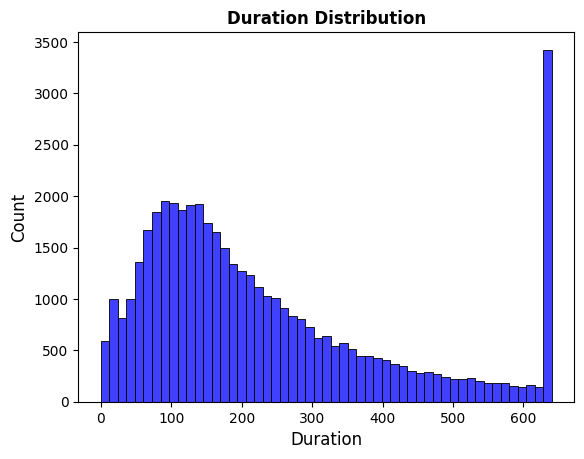

In [54]:
# Plotting the duration distribution to check the maximum and minimum reach

plt.title('Duration Distribution', fontsize = 12, color='black', fontweight='bold')
plt.xlabel('Duration',fontsize = 12, color='black')
plt.ylabel('Count',fontsize = 12, color='black')
sns.histplot((df.dur),color='blue')

Maximum duration for calls is between 90-150 secs.

In [55]:
# Plotting the conversion rate of different durations.

#dur_conversion_rates = df.groupby("dur")["Target"].mean()
#sorted_dur = dur_conversion_rates.reset_index().sort_values("Target")["dur"]
#plt.figure(figsize = (15,6))
#plt.title('Duration Conversion Rate', fontsize = 12, color='black', fontweight='bold')
#sns.barplot(x = 'dur', y = 'Target', data = df, order = sorted_dur, color = 'blue')
#plt.xticks(rotation=50)
#plt.show()

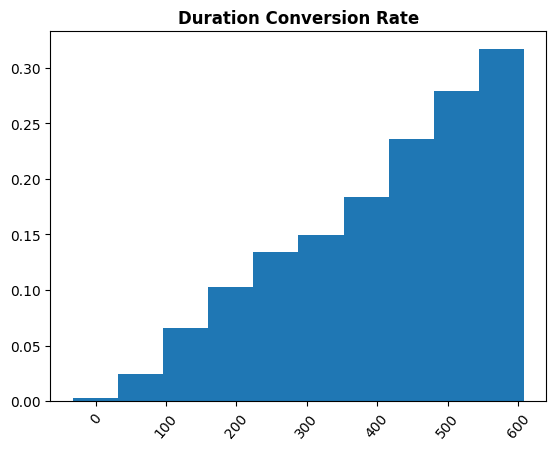

In [56]:
bins = np.linspace(df.dur.min(),df.dur.max(),11)
c=np.digitize(df.dur,bins)
plt.bar(bins[:-1], [np.mean(df.Target.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.title('Duration Conversion Rate', fontsize = 12, color='black', fontweight='bold')
plt.xticks(rotation=50)


plt.show()

As the duration of the calls increases, the conversion rate is also increasing.

## **Number of calls**

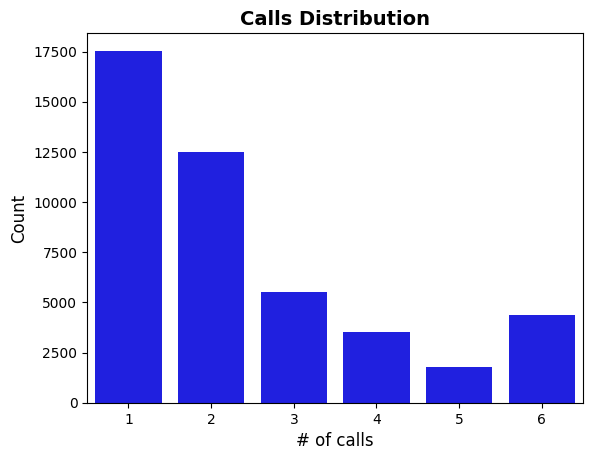

In [57]:
# Plotting the Number of calls to check the maximum and minimum reach

# Calculating the value counts
num_calls_counts = df['num_calls'].value_counts()

# Plotting
sns.barplot(x=num_calls_counts.index, y=num_calls_counts.values, color = 'blue')
plt.title('Calls Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('# of calls', fontsize=12, color='black')
plt.xticks(rotation=00)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

Maximum calls to individual are 1.

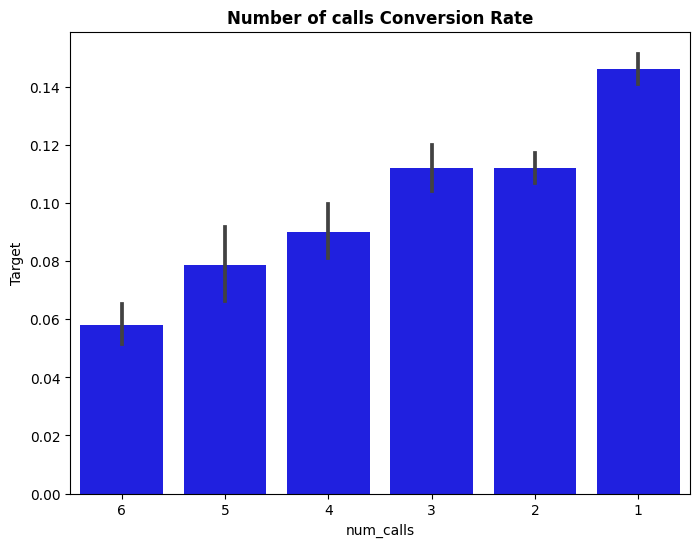

In [58]:
# Plotting the conversion rate of different number of calls.

num_calls_conversion_rates = df.groupby("num_calls")["Target"].mean()
sorted_num_calls = num_calls_conversion_rates.reset_index().sort_values("Target")["num_calls"]
plt.figure(figsize = (8,6))
plt.title('Number of calls Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'num_calls', y = 'Target', data = df, order = sorted_num_calls, color = 'blue')
plt.xticks(rotation=00)
plt.show()

From the above plot, it can be seen that fewer the calls more the conversion.

## **Previous Outcome**

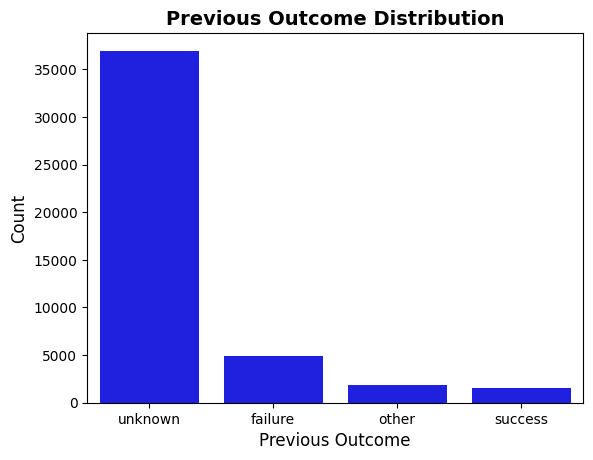

In [59]:
# Plotting the previous outcomes to check the maximum and minimum reach

# Calculating the value counts
prev_outcome_counts = df['prev_outcome'].value_counts()

# Plotting
sns.barplot(x=prev_outcome_counts.index, y=prev_outcome_counts.values, color = 'blue')
plt.title('Previous Outcome Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Previous Outcome', fontsize=12, color='black')
plt.xticks(rotation=00)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

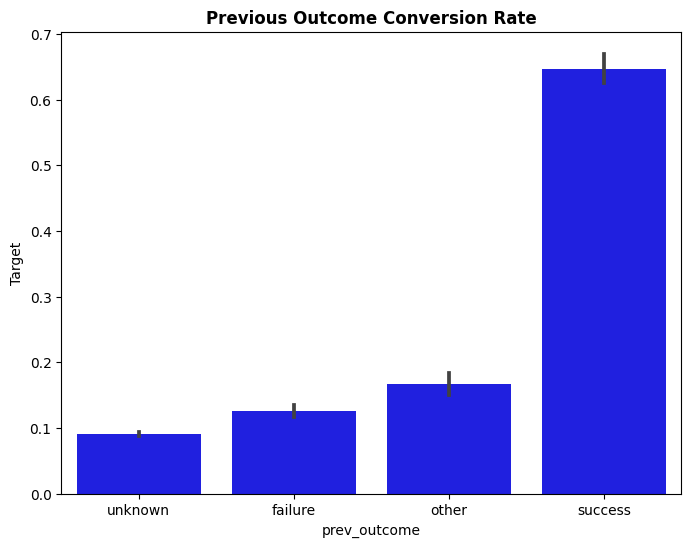

In [60]:
# Plotting the conversion rate of previous outcomes.

prev_outcome_conversion_rates = df.groupby("prev_outcome")["Target"].mean()
sorted_prev_outcome = prev_outcome_conversion_rates.reset_index().sort_values("Target")["prev_outcome"]
plt.figure(figsize = (8,6))
plt.title('Previous Outcome Conversion Rate', fontsize = 12, color='black', fontweight='bold')
sns.barplot(x = 'prev_outcome', y = 'Target', data = df, order = sorted_prev_outcome, color = 'blue')
plt.xticks(rotation=00)
plt.show()

Highest Conversion - Previous success outcome

Lowest Conversion - Previous outcome unknown

## **Target**

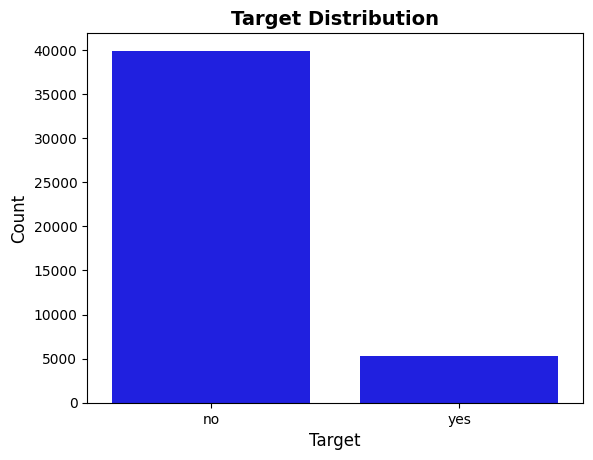

In [61]:
# Plotting the Target column

# Calculating the value counts
y_counts = df['y'].value_counts()

# Plotting
sns.barplot(x=y_counts.index, y=y_counts.values, color = 'blue')
plt.title('Target Distribution', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Target', fontsize=12, color='black')
plt.xticks(rotation=00)
plt.ylabel('Count', fontsize=12, color='black')

plt.show()

From this plot, it can be understood that this is an unbalanced dataset with maximum data points under 'no' class.

# **Encoding**

## **job**

In [62]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [63]:
df['job'] = df['job'].map({'management':7, 'technician':4, 'entrepreneur':1, 'blue-collar':0, 'retired':9, 'admin.':6, 'services':3, 'self-employed':5, 'unemployed':8, 'housemaid':2, 'student':10})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,4,single,secondary,unknown,5,may,151.0,1,unknown,no,0


## **Marital**

In [64]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [65]:
df['marital'] = df['marital'].map({'married':0, 'single':2, 'divorced':1})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,0,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,4,2,secondary,unknown,5,may,151.0,1,unknown,no,0


## **education_qual**

In [66]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [67]:
df['education_qual'] = df['education_qual'].map({'tertiary':2, 'secondary':1, 'primary':0})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,0,2,unknown,5,may,261.0,1,unknown,no,0
1,44.0,4,2,1,unknown,5,may,151.0,1,unknown,no,0


## **call_type**

In [68]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [69]:
df['call_type'] = df['call_type'].map({'unknown':0, 'cellular':2, 'telephone':1})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,0,2,0,5,may,261.0,1,unknown,no,0
1,44.0,4,2,1,0,5,may,151.0,1,unknown,no,0


## **Month**

In [70]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [71]:
df['mon'] = df['mon'].map({'may':0, 'jun':4, 'jul':1, 'aug':5, 'oct':8, 'nov':3, 'dec':10, 'jan':2, 'feb':6, 'mar':11, 'apr':7, 'sep':9})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,0,2,0,5,0,261.0,1,unknown,no,0
1,44.0,4,2,1,0,5,0,151.0,1,unknown,no,0


## **prev_outcome**

In [72]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [73]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,7,0,2,0,5,0,261.0,1,0,no,0
1,44.0,4,2,1,0,5,0,151.0,1,0,no,0


# **Feature and Target Selection**

In [74]:
x = df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values # Features
y = df['Target'].values # Target

# **Splitting the data**

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

# **Balancing the Data**

In [76]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [77]:
print(len(x_train_smt))
print(len(y_train_smt))

54837
54837


# **Scaling the data**

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Models**

## **Logistic Regression**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7767946023669948

In [80]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.00185359, 0.99814641],
       [0.57397609, 0.42602391],
       [0.57025076, 0.42974924],
       ...,
       [0.96870261, 0.03129739],
       [0.46032683, 0.53967317],
       [0.47904501, 0.52095499]])

In [81]:
y_pred_labels = np.round(y_pred[:, 1]).astype(int)
f1 = f1_score(y_test, y_pred_labels)
print("F1 score for logistic regression: ", round(f1, 2))

F1 score for logistic regression:  0.49


In [82]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", report)

Confusion Matrix:
[[6067 1905]
 [ 113  956]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      7972
           1       0.33      0.89      0.49      1069

    accuracy                           0.78      9041
   macro avg       0.66      0.83      0.67      9041
weighted avg       0.91      0.78      0.81      9041



## **KNN**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10, scoring = 'f1')))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.44251541189264854
K value : 2 Train Score :  0.9954775060634243 Cross Value Accuracy : 0.2928883211364906
K value : 3 Train Score :  0.9770775206521144 Cross Value Accuracy : 0.42911735424149383
K value : 4 Train Score :  0.9772963510038842 Cross Value Accuracy : 0.32445357191596885
K value : 5 Train Score :  0.9666830789430494 Cross Value Accuracy : 0.41002808082536435
K value : 6 Train Score :  0.9666830789430494 Cross Value Accuracy : 0.34670383964687096
K value : 7 Train Score :  0.9600452249393657 Cross Value Accuracy : 0.40702265857173314
K value : 8 Train Score :  0.959753451137006 Cross Value Accuracy : 0.32271188090205327
K value : 9 Train Score :  0.955030362711308 Cross Value Accuracy : 0.39075300350525843
K value : 10 Train Score :  0.9540273902656965 Cross Value Accuracy : 0.32942980086549145
K value : 20 Train Score :  0.9384721994273939 Cross Value Accuracy : 0.28740413085802513
K value : 30 Train Score :  0.9311596

k = 1 is the best cross validation score of 0.44251541189264854

In [84]:
knn= KNeighborsClassifier(1)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
knn_f1_score = f1_score(y_test, knn.predict(x_test_scaled))
print("F1 score for KNN classifier: ", round(knn_f1_score, 2))

KNN Score:  0.8440438004645504
F1 score for KNN classifier:  0.53


In [85]:
from sklearn.metrics import confusion_matrix, classification_report

knn_predictions = knn.predict(x_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, knn_predictions)
print("Classification Report:")
print(report)

Confusion Matrix:
[[6839 1133]
 [ 277  792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7972
           1       0.41      0.74      0.53      1069

    accuracy                           0.84      9041
   macro avg       0.69      0.80      0.72      9041
weighted avg       0.90      0.84      0.86      9041



## **Decision Tree**

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_test_scaled,y_test))
dt_f1_score = f1_score(y_test, dt.predict(x_test_scaled))
print("F1 score for Decision Tree classifier: ", round(dt_f1_score, 2))

Decision Tree Score :  0.1318438225859971
F1 score for Decision Tree classifier:  0.17


In [87]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10, scoring = 'f1') # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7774677681127706  Cross val score :  0.0
Depth  :  2  Training Accuracy :  0.8288564290533764  Cross val score :  0.3434200504003807
Depth  :  3  Training Accuracy :  0.8681729489213488  Cross val score :  0.3098819158324469
Depth  :  4  Training Accuracy :  0.8892536061418386  Cross val score :  0.5226171759534701
Depth  :  5  Training Accuracy :  0.9126137461932636  Cross val score :  0.469964765404783
Depth  :  6  Training Accuracy :  0.9261082845524008  Cross val score :  0.45666712670056464
Depth  :  7  Training Accuracy :  0.9374874628444299  Cross val score :  0.43613648905978997
Depth  :  8  Training Accuracy :  0.9463500920911063  Cross val score :  0.46159689639647805
Depth  :  9  Training Accuracy :  0.9526597005671353  Cross val score :  0.4493475543019557
Depth  :  10  Training Accuracy :  0.9619599905173514  Cross val score :  0.4620566535999327
Depth  :  20  Training Accuracy :  0.9994164523952805  Cross val score :  0.4670307726342051

Depth = 4 has the best cross validation score of 0.5226171759534701


In [88]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
dt_f1_score = f1_score(y_test, dt.predict(x_test))
print("F1 score for Decision Tree classifier: ", round(dt_f1_score, 2))

Decision Tree Score :  0.8892536061418386
F1 score for Decision Tree classifier:  0.48


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = dt.predict(x_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[6128 1844]
 [ 157  912]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7972
           1       0.33      0.85      0.48      1069

    accuracy                           0.78      9041
   macro avg       0.65      0.81      0.67      9041
weighted avg       0.90      0.78      0.81      9041



In [90]:
# Get feature importances
importance = dt.feature_importances_
feature_names = ["age", "job", "marital","education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"]

feature_importances = list(zip(importance, feature_names))

# Sorting
feature_importances.sort(reverse=True)

print("Feature Importances for Decision Tree")
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance:.4f}")

Feature Importances for Decision Tree
dur: 0.6226
mon: 0.2040
call_type: 0.1047
prev_outcome: 0.0581
job: 0.0106
num_calls: 0.0000
marital: 0.0000
education_qual: 0.0000
day: 0.0000
age: 0.0000


## **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test_scaled)
print("Random Forest accuracy Score : ", rf.score(x_test_scaled,y_test))
rf_f1_score = f1_score(y_test, rf.predict(x_test_scaled))
print("F1 score for Random Forest: ", round(rf_f1_score, 2))

Random Forest accuracy Score :  0.8817608671607123
F1 score for Random Forest:  0.0


In [92]:
#doing cross validation to get best value of max _depth to prevent overfitted model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,20,30,40,50]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10, scoring = 'f1') # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9994164523952805  Cross val score :  0.0
Depth  :  2  Training Accuracy :  0.9994164523952805  Cross val score :  0.019590786131419152
Depth  :  3  Training Accuracy :  0.9994164523952805  Cross val score :  0.13247607642062267
Depth  :  4  Training Accuracy :  0.9994164523952805  Cross val score :  0.2149565275761875
Depth  :  5  Training Accuracy :  0.9994164523952805  Cross val score :  0.2728436070214943
Depth  :  6  Training Accuracy :  0.9994164523952805  Cross val score :  0.31140383750514744
Depth  :  7  Training Accuracy :  0.9994164523952805  Cross val score :  0.38032629031511245
Depth  :  8  Training Accuracy :  0.9994164523952805  Cross val score :  0.43898928395495795
Depth  :  9  Training Accuracy :  0.9994164523952805  Cross val score :  0.4643431391642812
Depth  :  10  Training Accuracy :  0.9994164523952805  Cross val score :  0.475206123446292
Depth  :  11  Training Accuracy :  0.9994164523952805  Cross val score :  0.4777851794525

Depth = 19 has the best cross validation score of 0.4997438623981451

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=19,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train_smt, y_train_smt)
y_pred= rf.predict(x_test_scaled)
print("Accuracy Score of Random Forest Classifier:",round(accuracy_score(y_test, y_pred), 1))
rf_f1_score = f1_score(y_test, rf.predict(x_test))
print("F1 score for Random Forest classifier: ", round(rf_f1_score, 2))

Accuracy Score of Random Forest Classifier: 0.7
F1 score for Random Forest classifier:  0.62


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(x_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[7070  902]
 [ 193  876]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7972
           1       0.49      0.82      0.62      1069

    accuracy                           0.88      9041
   macro avg       0.73      0.85      0.77      9041
weighted avg       0.92      0.88      0.89      9041



In [103]:
# Get feature importances
importance = rf.feature_importances_
feature_names = ["age", "job", "marital","education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"]

feature_importances = list(zip(importance, feature_names))

# Sorting
feature_importances.sort(reverse=True)

print("Feature Importances for Random Forest")
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance:.4f}")

Feature Importances for Random Forest
dur: 0.4212
mon: 0.1325
prev_outcome: 0.1122
call_type: 0.0792
education_qual: 0.0498
day: 0.0465
marital: 0.0423
age: 0.0407
job: 0.0401
num_calls: 0.0356


## **XG Boost**

In [96]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10, scoring = 'f1')))

Learning rate :  0.01  Train score :  0.9400404836150774  Cross-Val score :  0.4907841080105479
Learning rate :  0.02  Train score :  0.9504531611867899  Cross-Val score :  0.5006088306583939
Learning rate :  0.03  Train score :  0.95827634626256  Cross-Val score :  0.5045306312140584
Learning rate :  0.04  Train score :  0.9642577092109342  Cross-Val score :  0.5118081243633736
Learning rate :  0.05  Train score :  0.9680142969163156  Cross-Val score :  0.5186273035027859
Learning rate :  0.06  Train score :  0.970713204588143  Cross-Val score :  0.5296748618676953
Learning rate :  0.07  Train score :  0.9737768295129201  Cross-Val score :  0.5326694778800004
Learning rate :  0.08  Train score :  0.974488028156172  Cross-Val score :  0.53473690635011
Learning rate :  0.09  Train score :  0.9761474916570928  Cross-Val score :  0.5415848716733336
Learning rate :  0.1  Train score :  0.9774422379050641  Cross-Val score :  0.5366676129612381
Learning rate :  0.11  Train score :  0.9786275

Learning rate = 13 has the best crossvalidation score of 0.5535782040625886

In [97]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

learning_rate = 0.13

xgbc = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=100, verbosity=0)
xgbc.fit(x_train_smt, y_train_smt)
y_pred = xgbc.predict(x_test)
print("Accuracy Score of XG Boost:",round(accuracy_score(y_test, y_pred), 1))
xg_f1_score = f1_score(y_test, xgbc.predict(x_test))
print("F1 score for XG Boost: ", round(xg_f1_score, 2))



Accuracy Score of XG Boost: 0.9
F1 score for XG Boost:  0.63


In [98]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgbc.predict(x_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[7168  804]
 [ 215  854]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7972
           1       0.52      0.80      0.63      1069

    accuracy                           0.89      9041
   macro avg       0.74      0.85      0.78      9041
weighted avg       0.92      0.89      0.90      9041



In [99]:
# Get feature importances
importance = xgbc.feature_importances_
feature_names = ["age", "job", "marital","education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"]

feature_importances = list(zip(importance, feature_names))

# Sorting
feature_importances.sort(reverse=True)

print("Feature Importances for XG Boost")
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance:.4f}")

Feature Importances for XG Boost
call_type: 0.2176
dur: 0.2162
prev_outcome: 0.1643
mon: 0.1130
education_qual: 0.0913
marital: 0.0629
num_calls: 0.0628
job: 0.0363
day: 0.0200
age: 0.0156


# **Conclusion**

Of all the models, XG Boost is the best model with a F1 score of 63%

Below is the comparison of all models

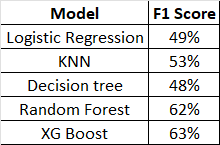

As per XG Boost model, duration and Call Type are the top 2 features

In [100]:
import pickle
pickle_out = open("project1.pkl","wb")
pickle.dump(xgbc, pickle_out)
pickle_out.close()